In [1]:
using Revise
using CellBasedModels
using GLMakie

Precompiling CellBasedModels
  ✓ CellBasedModels
  1 dependency successfully precompiled in 15 seconds. 422 already precompiled.
[ Info: Precompiling CellBasedModels [388cb286-f2b1-4654-a3bb-2e137a39c658]


# 1D

In [10]:
model = ABM(1,

    medium = Dict(
        :co2 => Float64,
        :vein => Float64,
    ),

    model = Dict(
        :co2Max => Float64,
        :Dco2 => Float64
    ),

    mediumODE = quote
        if @mediumInside()
            dt(co2) = vein*(co2Max-co2)
        end 
    end,

    mediumAlg = CBMIntegrators.DGADI(difussionCoefs=(co2=:Dco2))
);

In [35]:
nx = 10^2
xmax = 1
dx = xmax/nx
x = range(0,1,length=nx)
u0 = zeros(nx)

com = Community(model,dt=.01, N=0, NMedium=[nx], simBox=[0 xmax])
com.vein[round(Int,nx/2)] = 1.
com.co2Max = 1.
com.Dco2 = .001

loadToPlatform!(com)
@time for i in 1:200
    step!(com)
end

  0.003815 seconds (22.40 k allocations: 1.421 MiB)


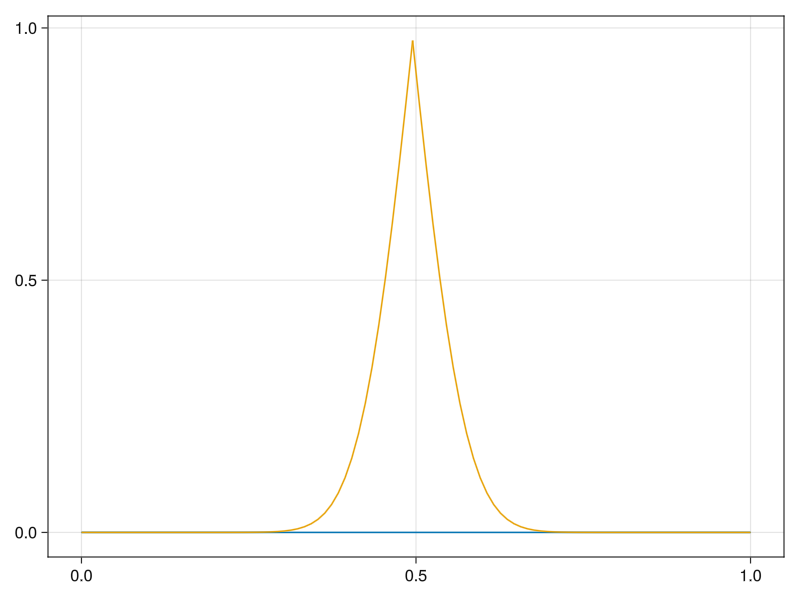

In [36]:
fig = Figure()

ax = Axis(fig[1,1])
lines!(ax, x, u0)
lines!(ax, x, com.co2)

fig

# 2D

In [5]:
model = ABM(2,

    medium = Dict(
        :co2 => Float64,
        :vein => Float64,
    ),

    model = Dict(
        :co2Max => Float64
    ),

    mediumODE = quote
        if @mediumInside()
            dt(co2) = vein*(co2Max-co2)
        end 
    end,

    mediumAlg = CBMIntegrators.DGADI()
);

In [6]:
nx = 101
ny = 101
xmax = 1
ymax = 1

dx = xmax/nx
dy = ymax/ny
x = range(0,1,length=nx)
y = range(0,1,length=ny)
u0 = [0 for X ∈ x, Y ∈ y]

com = Community(model,dt=0.01, N=0, NMedium=[nx,ny], simBox=[0 xmax;0 ymax])
com.vein[round(Int,nx/2),round(Int,ny/2)] = 1.
com.co2Max = 1.

loadToPlatform!(com)
@time for i in 1:500
    step!(com)
end

  2.189965 seconds (883.62 k allocations: 56.696 MiB, 1.09% gc time, 125.99% compilation time)


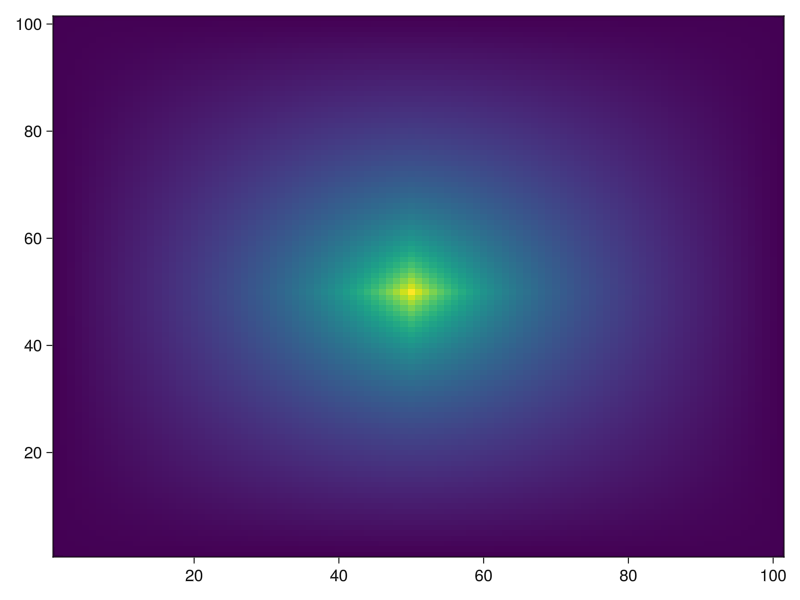

In [7]:
fig = Figure()

ax = Axis(fig[1,1])
heatmap!(ax, com.co2)

# ax = Axis3(fig[1,1])
# wireframe!(ax, x, y, u0)
# wireframe!(ax, x, y, com.co2)

figc

# 3D

In [56]:
model = ABM(3,

    medium = Dict(
        :co2 => Float64,
        :vein => Float64
    ),

    model = Dict(
        :co2Max => Float64,
        :Dco2 => Float64
    ),

    agentRule = quote
        
        co2 = 0

    end,

    mediumODE = quote
        if @mediumInside()
            dt(co2) = 0#vein*(co2Max-co2)
        end 
    end,

    mediumAlg = CBMIntegrators.DGADI()
);

In [61]:
nx = 101
ny = 101
nz = 101
xmax = 1
ymax = 1
zmax = 1

dx = xmax/nx
dy = ymax/ny
dz = zmax/nz
x = range(0,1,length=nx)
y = range(0,1,length=ny)
z = range(0,1,length=nz)
u0 = [1 for X ∈ x, Y ∈ y, Z ∈ z]

com = Community(model,dt=0.01, N=1, NMedium=[nx,ny,nz], simBox=[0 xmax;0 ymax;0 zmax])
com.x .= 0.7
com.y .= 0.5
com.z .= 0.5
com.vein[round(Int,nx/2),round(Int,ny/2),round(Int,nz/2)] = 1.
com.co2Max = 1.
com.co2 .= 1

loadToPlatform!(com)
@time for i in 1:200
    step!(com)
end


  5.719416 seconds (1.29 M allocations: 142.095 MiB)


(101, 101, 101)

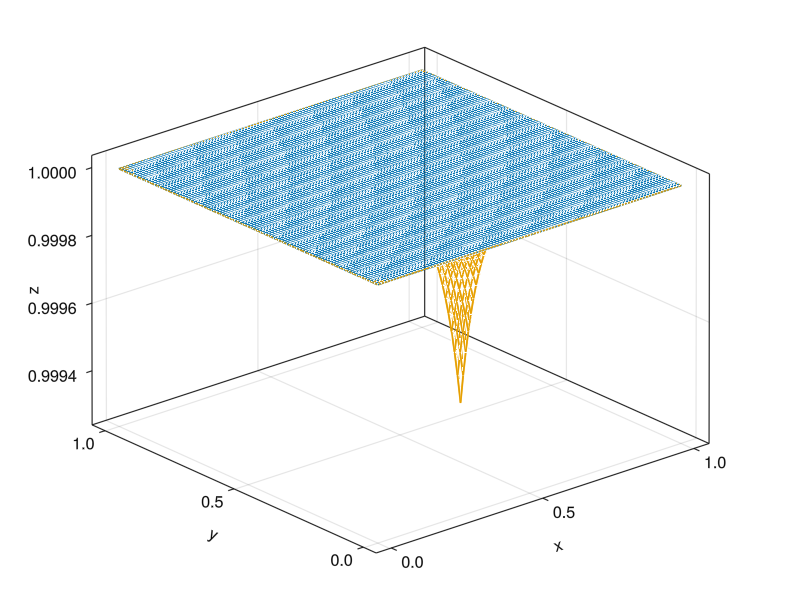

In [60]:
fig = Figure()

ax = Axis3(fig[1,1])
wireframe!(ax, x, y, u0[:,:,round(Int,nz/2)])
wireframe!(ax, x, y, com.co2[:,:,round(Int,nz/2)])

fig